In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pywt
from scipy import stats

In [3]:
def autocorr(X, max_d):
    ac = np.zeros(max_d)
    D = np.arange(max_d)
    ac[0] = 1.0
    for d in D[1:]:
        X1 = X[:-d]
        X2 = X[d:]
        ac[d] = np.nanmean(X1 * X2) - np.nanmean(X1)*np.nanmean(X2)
        ac[d] /= np.nanstd(X1)*np.nanstd(X2)
    return D, ac

def autocov(X, max_d):
    ac = np.zeros(max_d)
    D = np.arange(max_d)
    ac[0] = np.var(X)
    for d in D[1:]:
        X1 = X[:-d]
        X2 = X[d:]
        ac[d] = np.nanmean(X1 * X2) - np.nanmean(X1)*np.nanmean(X2)
    return D, ac

def anscombe_transform(X):
    return 2.0*np.sqrt(X)
def anscombe_transform_inverse(X):
    return (X/2.0)**2

def denoise_wavelets(wavelet_coeffs, t=1.0):
    return [wavelet_coeffs[0]] + [np.sign(wc)*np.maximum(0, np.abs(wc) - t) for wc in wavelet_coeffs[1:]]

In [4]:
def denoise(X, wavelet='db1', extension_mode='constant', t=1.0, anscombe=True):
    if anscombe:
        X = anscombe_transform(X)
    wc = pywt.wavedec(X, wavelet, extension_mode)
    wc_denoised = denoise_wavelets(wc, t=t)
    inv = pywt.waverec(wc_denoised, wavelet, extension_mode)
    if len(inv) > len(X):
        inv = inv[:-(len(inv)-len(X))]
    if anscombe:
        inv = anscombe_transform_inverse(inv)
    return inv

In [5]:
recomb_dir = "../data/recombination_maps/Comeron_tables/"
w_start_r, recomb = np.loadtxt(recomb_dir + 'Comeron_100kb_chr2L.txt', unpack=True)

In [6]:
div_fn = "../sandbox/Chr2L.all.N0.diversity.100000.txt.gz"
w_start_d, n_sites, n_poly, pi, avg_maf = np.loadtxt(div_fn,
                                           skiprows=1, usecols=np.arange(5), unpack=True)

In [7]:
print(w_start_r.shape, w_start_d.shape)

(231,) (214,)


In [8]:
print([int(w) for w in w_start_r[:10]])
print([int(w) for w in w_start_d[:10]])

[1, 100001, 200001, 300001, 400001, 500001, 600001, 700001, 800001, 900001]
[100001, 200001, 300001, 400001, 500001, 600001, 700001, 800001, 900001, 1000001]


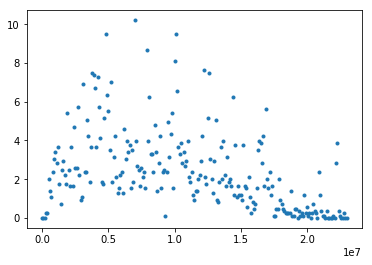

In [9]:
plt.plot(w_start_r, recomb,'.')
plt.show()

threshold = 0.0


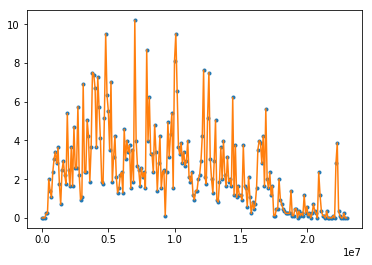

threshold = 0.5


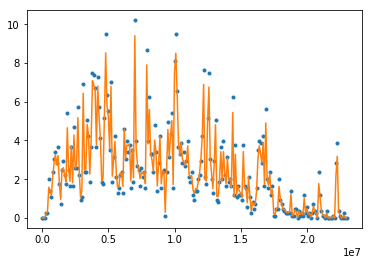

threshold = 1.0


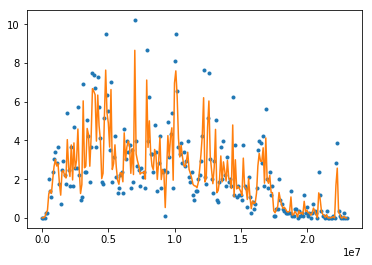

threshold = 1.5


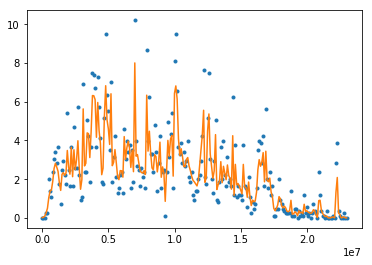

threshold = 2.0


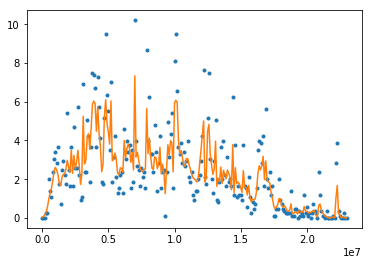

threshold = 2.5


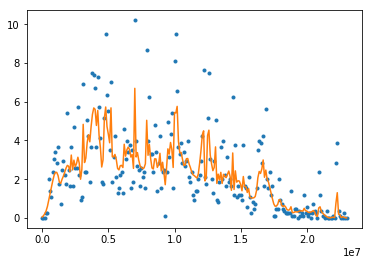

threshold = 3.0


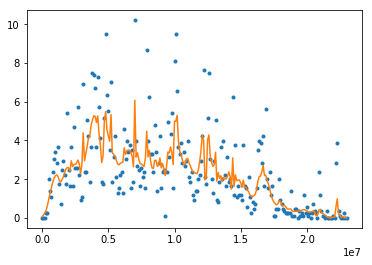

threshold = 3.5


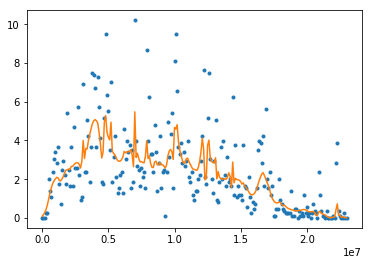

threshold = 4.0


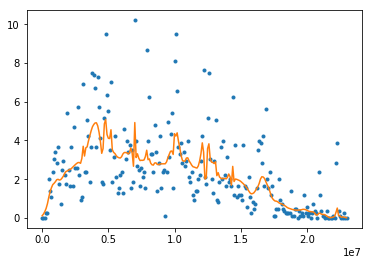

threshold = 4.5


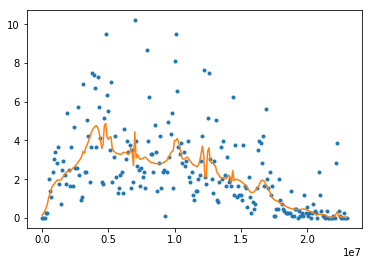

threshold = 5.0


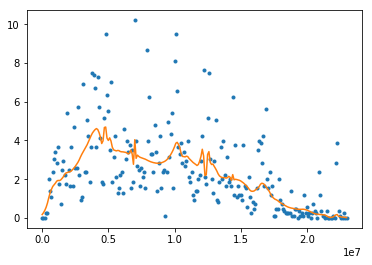

threshold = 5.5


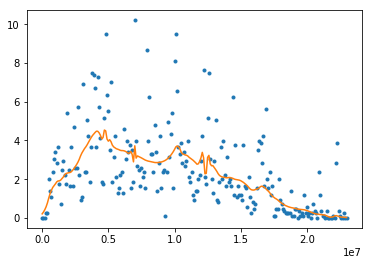

threshold = 6.0


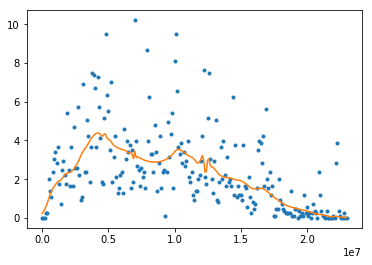

threshold = 6.5


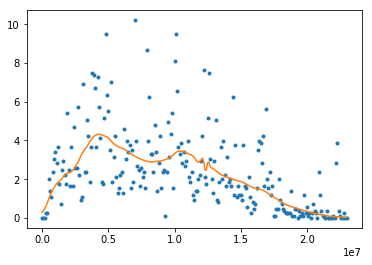

threshold = 7.0


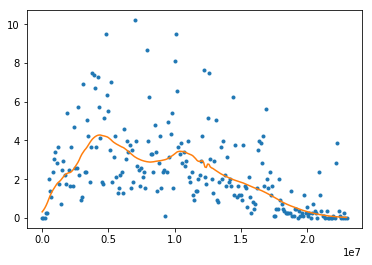

threshold = 7.5


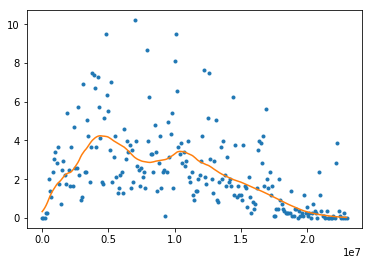

threshold = 8.0


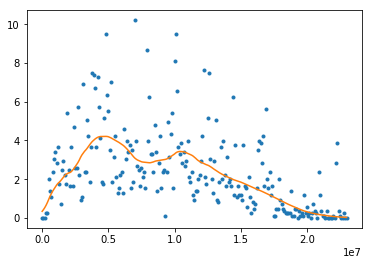

threshold = 8.5


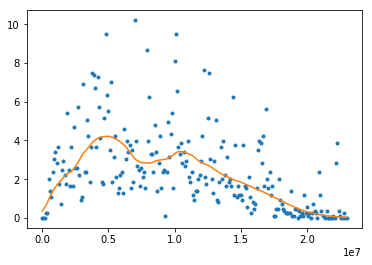

threshold = 9.0


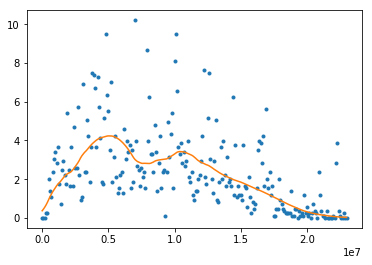

threshold = 9.5


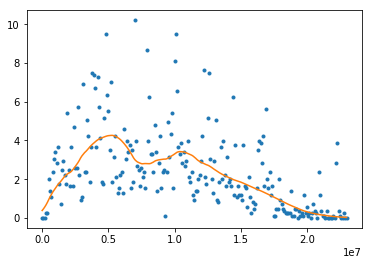

threshold = 10.0


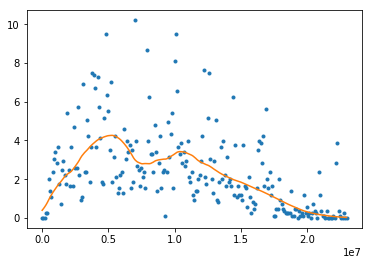

In [10]:
wavelet = 'db4'
T = np.arange(0, 10.5, 0.5)
R = []

min_r = min(recomb[recomb>0])
rem, recomb_norm = np.modf(recomb / min_r)
for t in T:
    print("threshold = {}".format(t))
    r_denoised = denoise(recomb_norm, t=t, wavelet=wavelet)*min_r
    R.append(r_denoised)
    plt.plot(w_start_r, recomb,'.')
    plt.plot(w_start_r, r_denoised)
    plt.show()

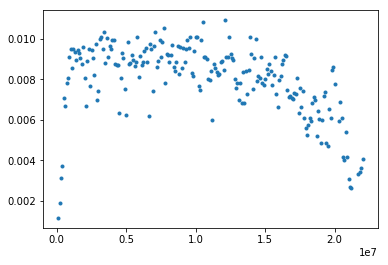

In [11]:
plt.plot(w_start_d, pi,'.')
plt.show()

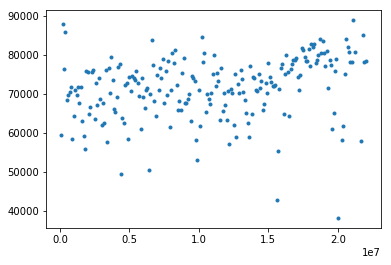

In [12]:
plt.plot(w_start_d, n_sites, '.')
plt.show()

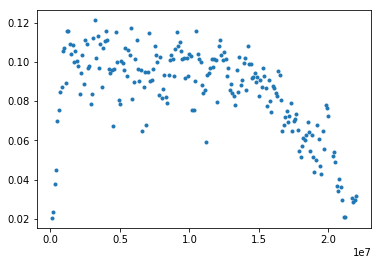

In [13]:
plt.plot(w_start_d, n_poly/n_sites, '.')
plt.show()

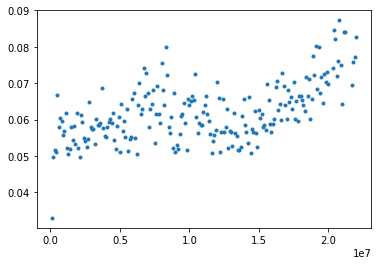

In [14]:
plt.plot(w_start_d, avg_maf, '.')
plt.show()

In [15]:
R_sub = [r[[w in w_start_d for w in w_start_r]] for r in R]

Threshold: 0.0
Pearson R:  0.492
Spearman R: 0.567
Slope: 0.00043


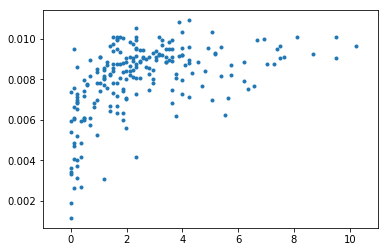

Threshold: 0.5
Pearson R:  0.526
Spearman R: 0.591
Slope: 0.00050


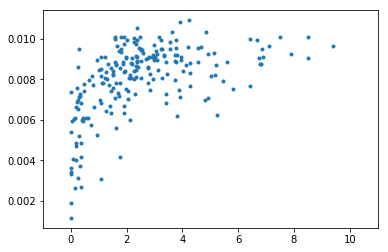

Threshold: 1.0
Pearson R:  0.560
Spearman R: 0.606
Slope: 0.00058


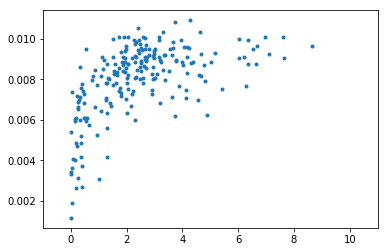

Threshold: 1.5
Pearson R:  0.594
Spearman R: 0.614
Slope: 0.00066


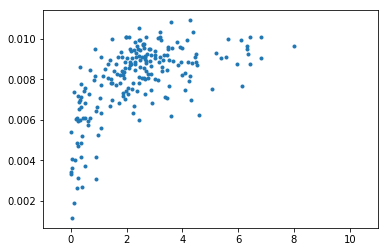

Threshold: 2.0
Pearson R:  0.624
Spearman R: 0.625
Slope: 0.00075


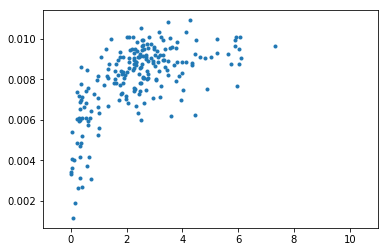

Threshold: 2.5
Pearson R:  0.650
Spearman R: 0.634
Slope: 0.00083


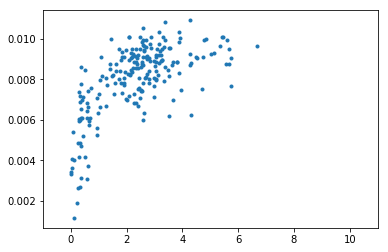

Threshold: 3.0
Pearson R:  0.672
Spearman R: 0.636
Slope: 0.00090


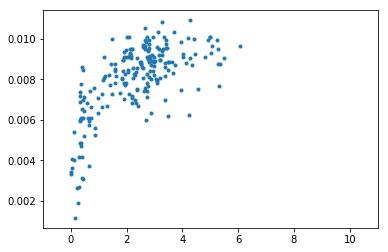

Threshold: 3.5
Pearson R:  0.688
Spearman R: 0.643
Slope: 0.00095


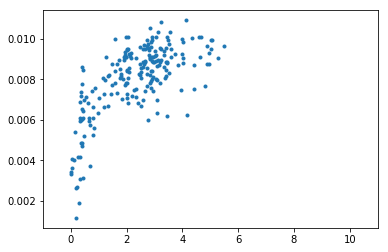

Threshold: 4.0
Pearson R:  0.699
Spearman R: 0.648
Slope: 0.00100


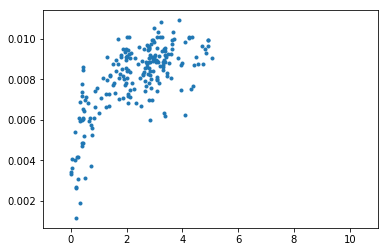

Threshold: 4.5
Pearson R:  0.706
Spearman R: 0.654
Slope: 0.00102


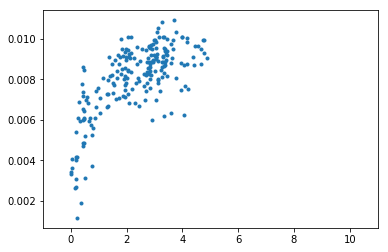

Threshold: 5.0
Pearson R:  0.707
Spearman R: 0.652
Slope: 0.00104


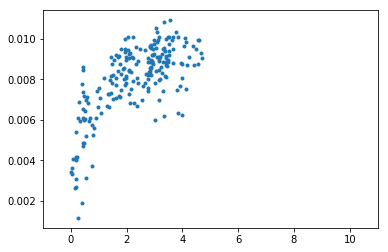

Threshold: 5.5
Pearson R:  0.705
Spearman R: 0.646
Slope: 0.00105


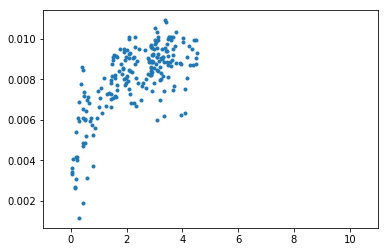

Threshold: 6.0
Pearson R:  0.700
Spearman R: 0.638
Slope: 0.00104


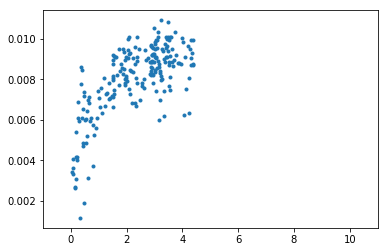

Threshold: 6.5
Pearson R:  0.693
Spearman R: 0.628
Slope: 0.00104


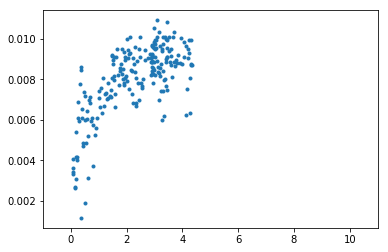

Threshold: 7.0
Pearson R:  0.690
Spearman R: 0.624
Slope: 0.00103


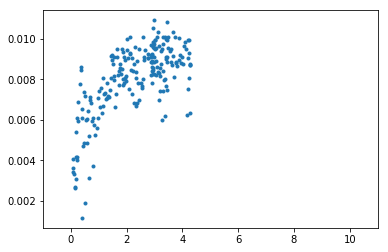

Threshold: 7.5
Pearson R:  0.687
Spearman R: 0.619
Slope: 0.00103


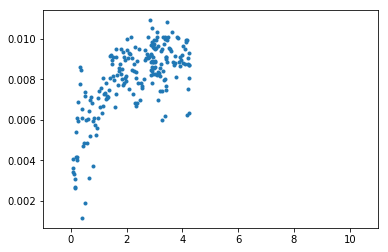

Threshold: 8.0
Pearson R:  0.685
Spearman R: 0.617
Slope: 0.00102


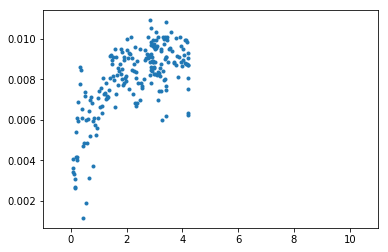

Threshold: 8.5
Pearson R:  0.682
Spearman R: 0.614
Slope: 0.00102


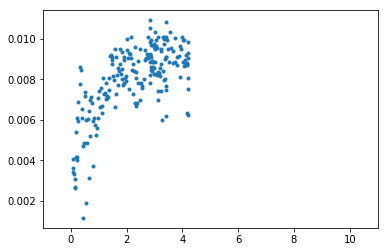

Threshold: 9.0
Pearson R:  0.679
Spearman R: 0.613
Slope: 0.00101


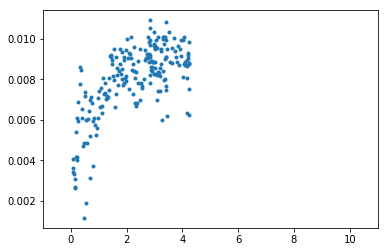

Threshold: 9.5
Pearson R:  0.677
Spearman R: 0.612
Slope: 0.00101


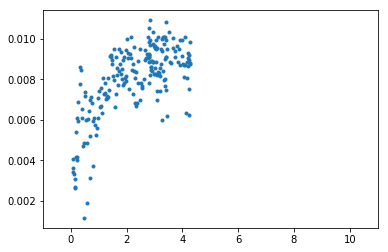

Threshold: 10.0
Pearson R:  0.676
Spearman R: 0.612
Slope: 0.00101


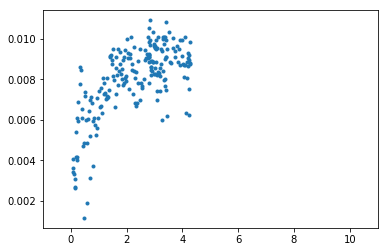

In [16]:
pearson_R = []
spearman_R = []
for t, r_sm in zip(T, R_sub):
    pR = stats.pearsonr(r_sm, pi)[0]
    sR = stats.spearmanr(r_sm, pi)[0]
    print("Threshold: {}".format(t))
    print("Pearson R:  {:.3f}".format(pR))
    print("Spearman R: {:.3f}".format(sR))
    pearson_R.append(pR)
    spearman_R.append(sR)
    
    lin_reg = stats.linregress(r_sm, pi)
    print("Slope: {:.5f}".format(lin_reg.slope))

    plt.plot(r_sm, pi, '.')
    plt.xlim([-1,11])
    plt.show()

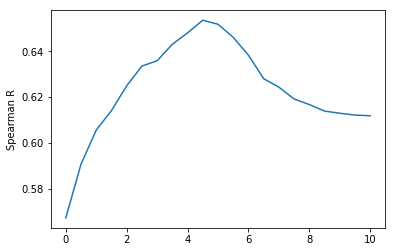

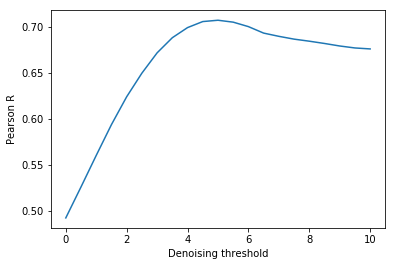

In [17]:
plt.plot(T, spearman_R)
plt.ylabel('Spearman R')
plt.show()
plt.plot(T, pearson_R)
plt.ylabel('Pearson R')
plt.xlabel('Denoising threshold')
plt.show()

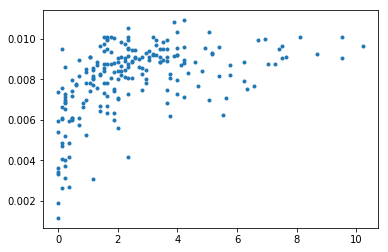

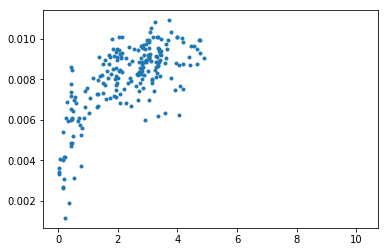

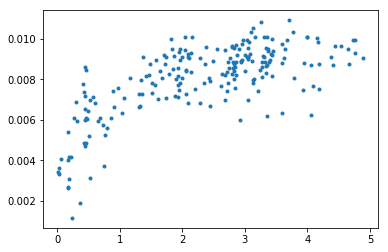

In [18]:
plt.plot(R_sub[0], pi, '.')
xlim = plt.gca().get_xlim()
plt.show()
plt.plot(R_sub[9], pi, '.')
plt.xlim(xlim)
plt.show()
plt.plot(R_sub[9], pi, '.')
plt.show()

In [19]:
chroms = ['2L','2R','3L','3R']
POS = []
R_raw = []
R_sm  = []
PI    = []
for c in chroms:
    w_start_r, recomb = np.loadtxt(recomb_dir + 'Comeron_100kb_chr{}.txt'.format(c), unpack=True)
    div_fn = "../sandbox/Chr{}.all.N0.diversity.100000.txt.gz".format(c)
    pos, pi = np.loadtxt(div_fn, skiprows=1, usecols=[0,3], unpack=True)
    
    min_r = min(recomb[recomb>0])
    recomb_norm = np.round(recomb / min_r)
    r_denoised = denoise(recomb_norm, t=4.5, wavelet=wavelet)*min_r
    
    R_raw.append(recomb[[w in pos for w in w_start_r]])
    R_sm.append(r_denoised[[w in pos for w in w_start_r]])
    POS.append(pos)
    PI.append(pi)

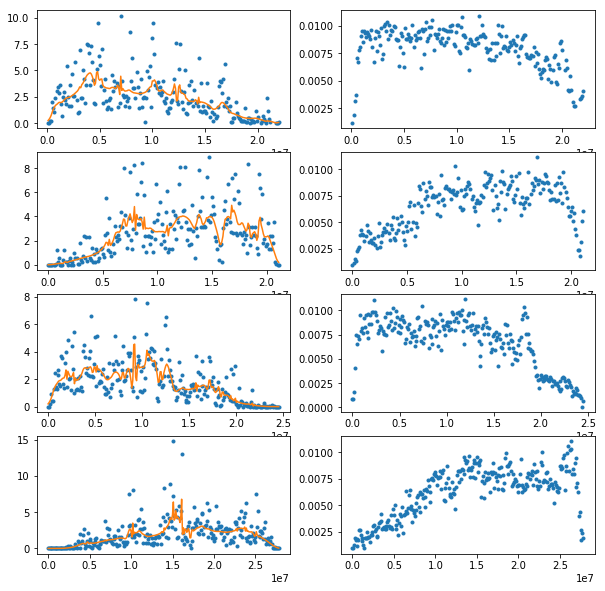

In [20]:
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(4,2, 2*i + 1)
    ax.plot(POS[i], R_raw[i], '.')
    ax.plot(POS[i], R_sm[i], '-')
    
    ax = plt.subplot(4,2, 2*i + 2)
    ax.plot(POS[i], PI[i], '.')

plt.show()

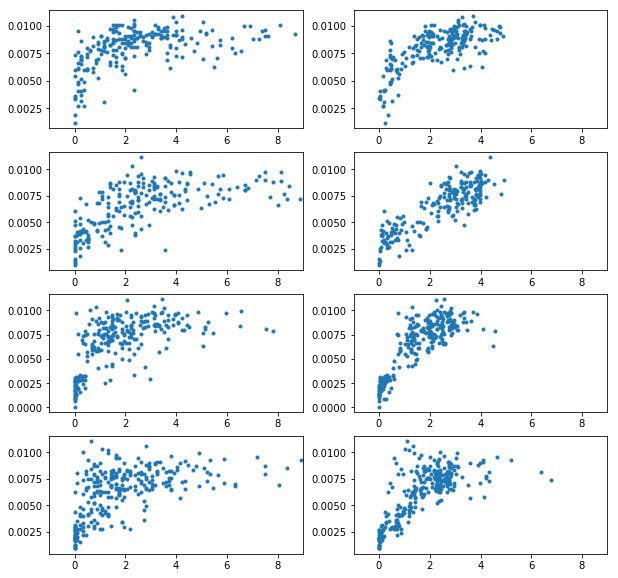

In [21]:
plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(4,2, 2*i + 1)
    ax.plot(R_raw[i], PI[i], '.')
    ax.set_xlim([-1,9])
    
    ax = plt.subplot(4,2, 2*i + 2)
    ax.plot(R_sm[i], PI[i], '.')
    ax.set_xlim([-1,9])

plt.show()

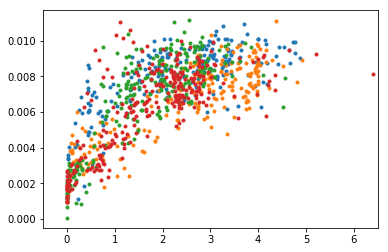

In [22]:
for i in range(4):
    plt.plot(R_sm[i], PI[i], '.')
    plt.xlim([-0.5,6.5])
plt.show()

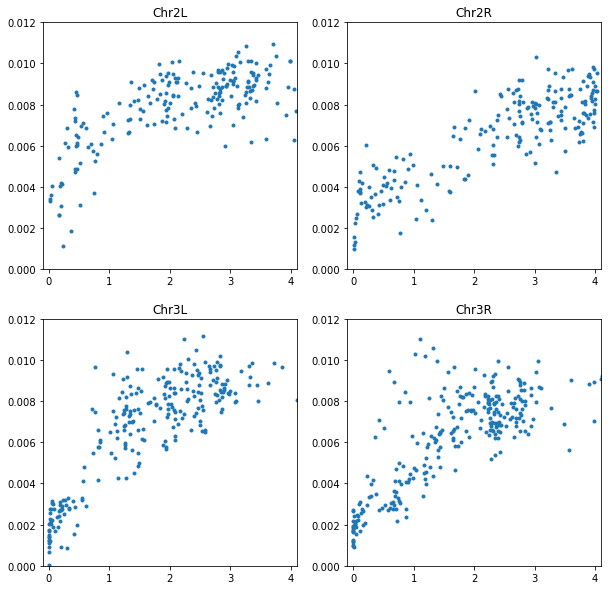

In [23]:
plt.figure(figsize=(10,10))
for i in range(4):    
    ax = plt.subplot(2,2, i+1)
    ax.plot(R_sm[i], PI[i], '.')
    ax.set_title('Chr{}'.format(chroms[i]))
    ax.set_xlim([-0.1,4.1])
    ax.set_ylim([0,0.012])
plt.show()

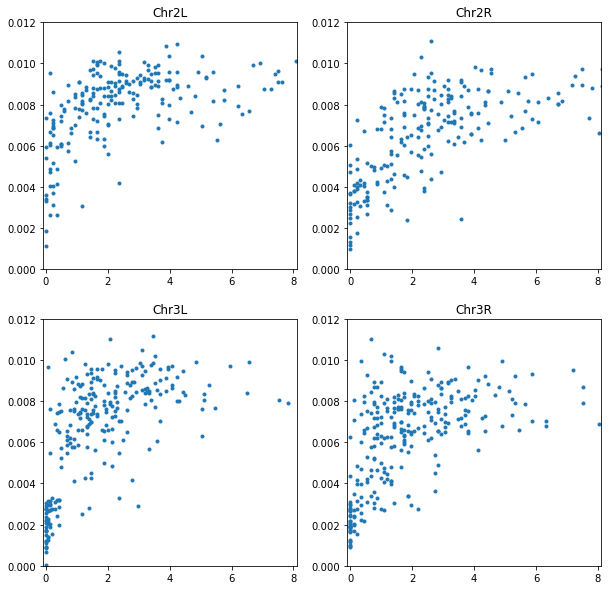

In [24]:
plt.figure(figsize=(10,10))
for i in range(4):    
    ax = plt.subplot(2,2, i+1)
    ax.plot(R_raw[i], PI[i], '.')
    ax.set_title('Chr{}'.format(chroms[i]))
    ax.set_xlim([-0.1,8.1])
    ax.set_ylim([0,0.012])
plt.show()

# Simulations

In [33]:
dx = 0.01
sig_y = 0.1
#f_y = 5
f_y = 20
a_y = 0.1

y0 = 0.5
sig_z = 0.05

X = np.arange(0,1+dx,dx)
Y = 4*X*(1-X) + a_y*np.sin(2*np.pi*X * f_y)
Z = 1-np.exp(-Y/y0)
Y_obs = np.random.normal(Y, scale=sig_y)
Z_obs = np.random.normal(Z, scale=sig_z)

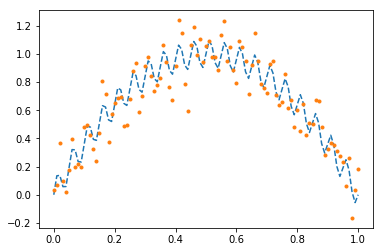

In [34]:
plt.plot(X,Y,'--')
plt.plot(X,Y_obs,'.')
plt.show()

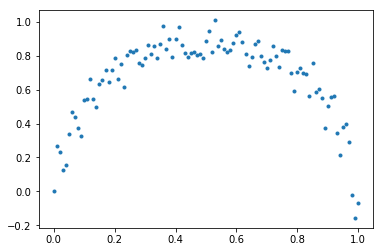

In [35]:
plt.plot(X,Z_obs,'.')
plt.show()

threshold = 0.0


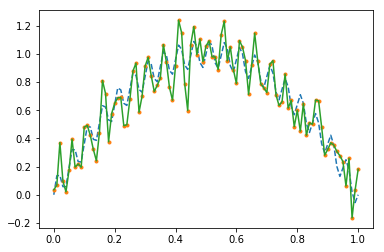

threshold = 0.05


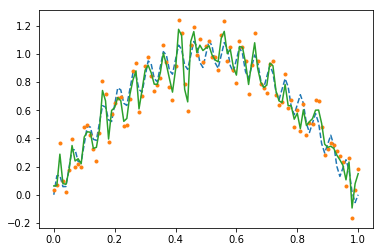

threshold = 0.1


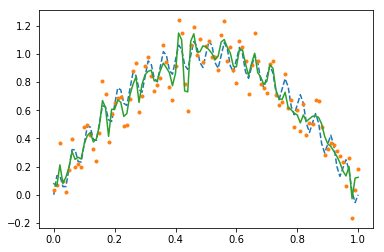

threshold = 0.15000000000000002


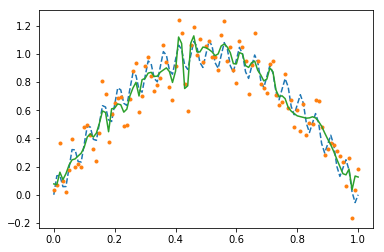

threshold = 0.2


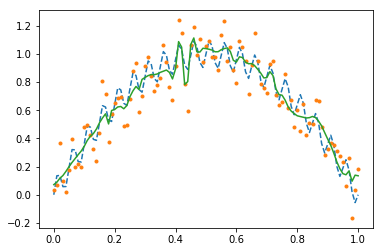

threshold = 0.25


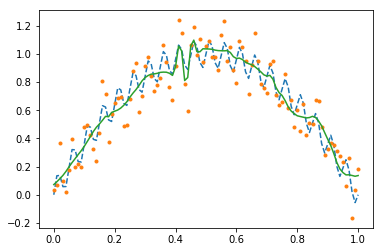

threshold = 0.30000000000000004


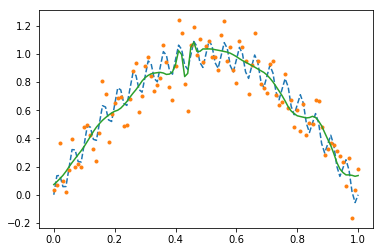

threshold = 0.35000000000000003


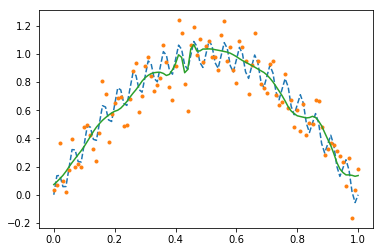

threshold = 0.4


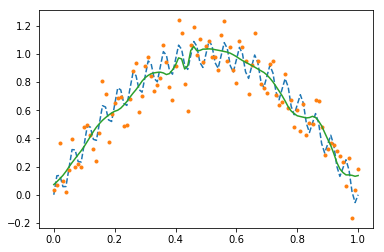

threshold = 0.45


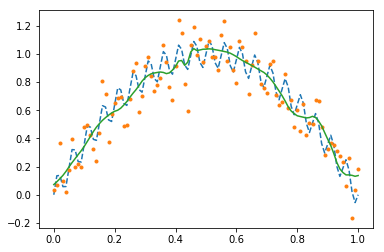

threshold = 0.5


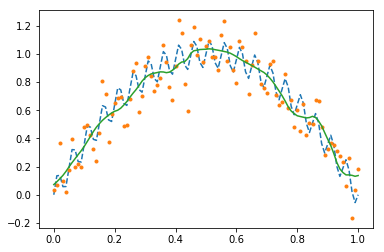

threshold = 0.55


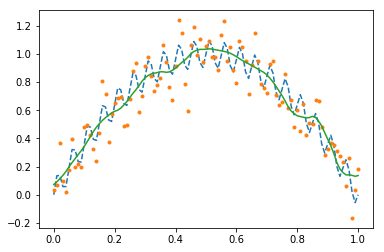

threshold = 0.6000000000000001


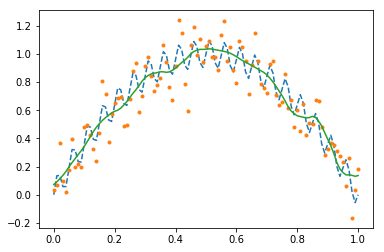

threshold = 0.65


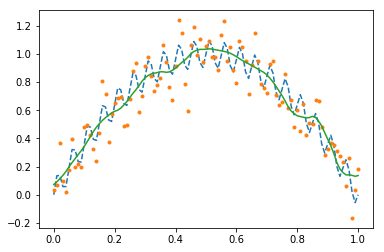

threshold = 0.7000000000000001


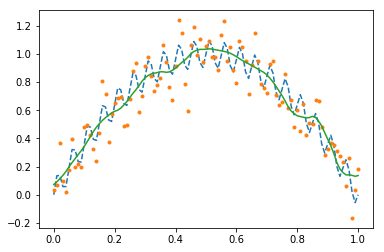

threshold = 0.75


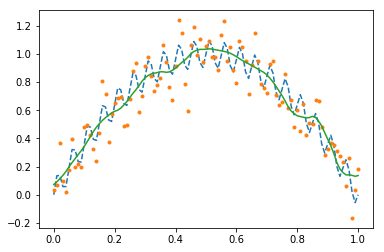

threshold = 0.8


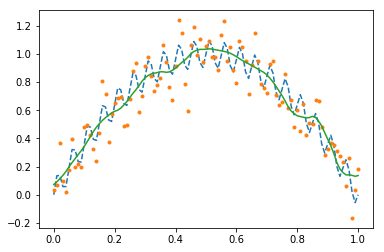

threshold = 0.8500000000000001


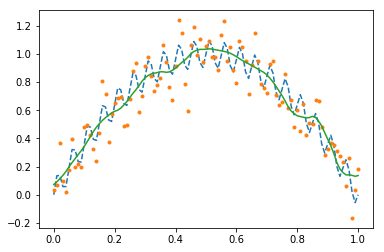

threshold = 0.9


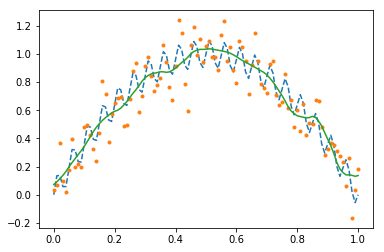

threshold = 0.9500000000000001


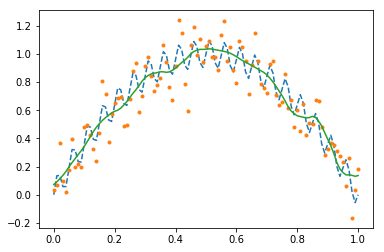

threshold = 1.0


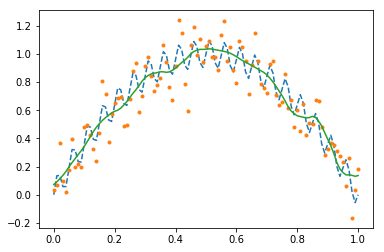

In [36]:
wavelet = 'db4'
T = sig_y * np.arange(0, 10.5, .5)
Y_hat = []
for t in T:
    print("threshold = {}".format(t))
    y_denoised = denoise(Y_obs, t=t, wavelet=wavelet, anscombe=False)
    Y_hat.append(y_denoised)
    plt.plot(X, Y,'--')
    plt.plot(X, Y_obs, '.')
    plt.plot(X, y_denoised, '-')
    plt.show()

Threshold: 0.0
Pearson R:  0.874
Spearman R: 0.889
Slope: 0.66146


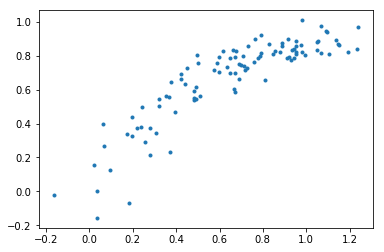

Threshold: 0.05
Pearson R:  0.890
Spearman R: 0.899
Slope: 0.70001


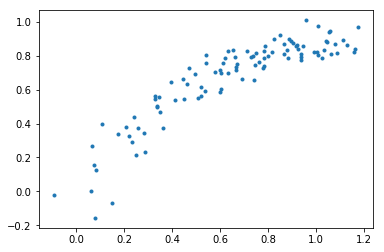

Threshold: 0.1
Pearson R:  0.894
Spearman R: 0.898
Slope: 0.72025


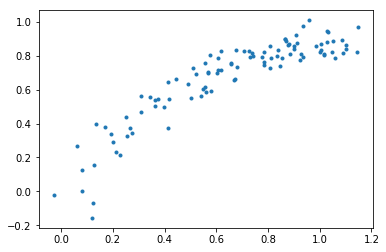

Threshold: 0.15000000000000002
Pearson R:  0.895
Spearman R: 0.894
Slope: 0.73099


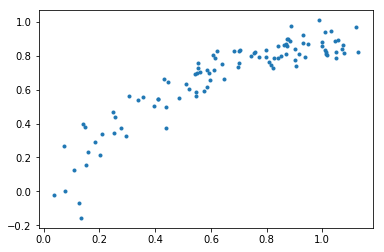

Threshold: 0.2
Pearson R:  0.893
Spearman R: 0.893
Slope: 0.73541


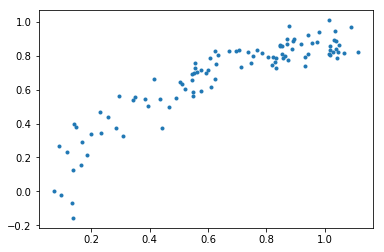

Threshold: 0.25
Pearson R:  0.892
Spearman R: 0.891
Slope: 0.73778


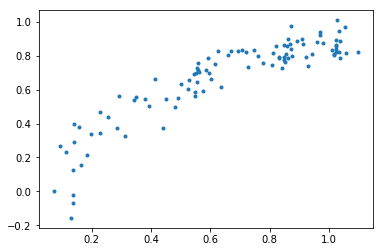

Threshold: 0.30000000000000004
Pearson R:  0.892
Spearman R: 0.883
Slope: 0.73925


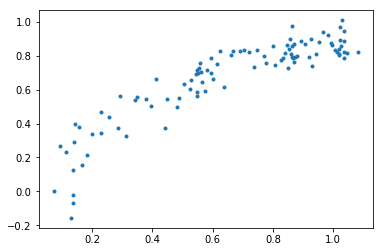

Threshold: 0.35000000000000003
Pearson R:  0.892
Spearman R: 0.880
Slope: 0.74019


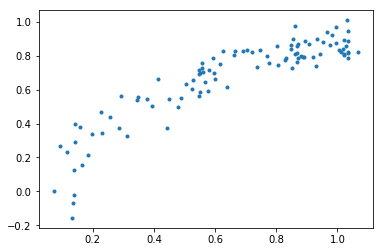

Threshold: 0.4
Pearson R:  0.892
Spearman R: 0.880
Slope: 0.74089


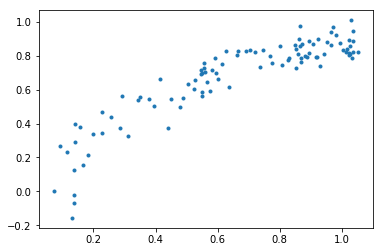

Threshold: 0.45
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74117


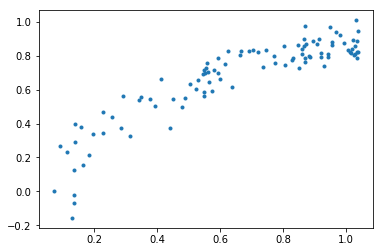

Threshold: 0.5
Pearson R:  0.892
Spearman R: 0.878
Slope: 0.74104


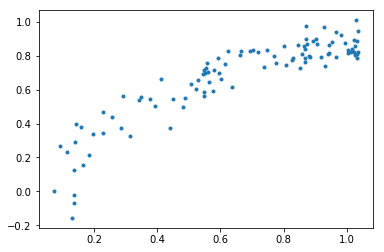

Threshold: 0.55
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


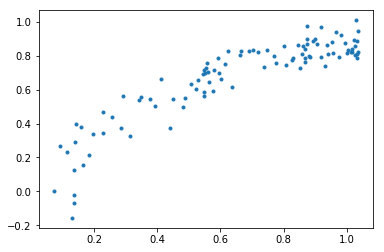

Threshold: 0.6000000000000001
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


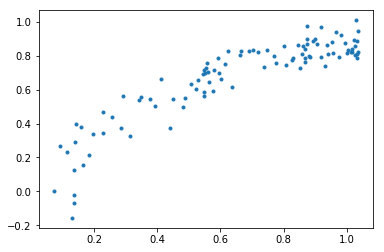

Threshold: 0.65
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


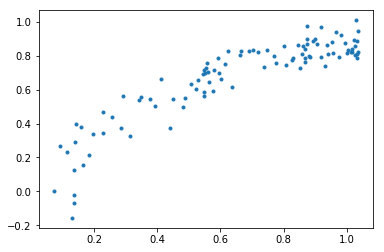

Threshold: 0.7000000000000001
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


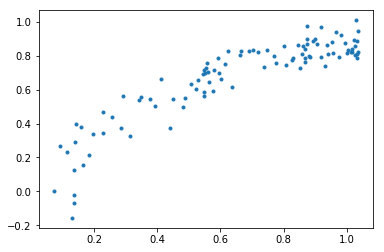

Threshold: 0.75
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


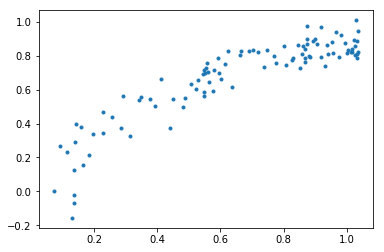

Threshold: 0.8
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


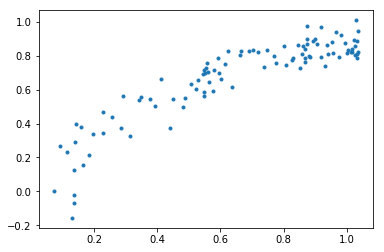

Threshold: 0.8500000000000001
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


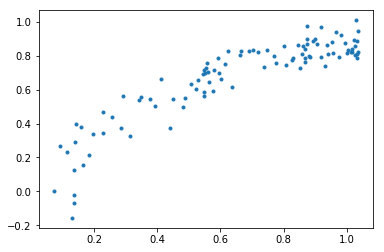

Threshold: 0.9
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


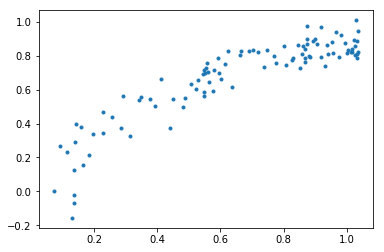

Threshold: 0.9500000000000001
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


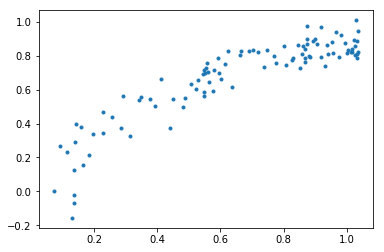

Threshold: 1.0
Pearson R:  0.892
Spearman R: 0.879
Slope: 0.74089


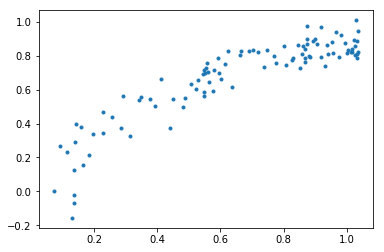

In [37]:
pearson_R = []
spearman_R = []
for t, y_hat in zip(T, Y_hat):
    pR = stats.pearsonr(y_hat, Z_obs)[0]
    sR = stats.spearmanr(y_hat, Z_obs)[0]
    print("Threshold: {}".format(t))
    print("Pearson R:  {:.3f}".format(pR))
    print("Spearman R: {:.3f}".format(sR))
    pearson_R.append(pR)
    spearman_R.append(sR)
    
    lin_reg = stats.linregress(y_hat, Z_obs)
    print("Slope: {:.5f}".format(lin_reg.slope))

    plt.plot(y_hat, Z_obs, '.')
    #plt.xlim([-1,11])
    plt.show()

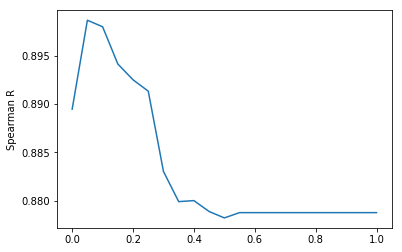

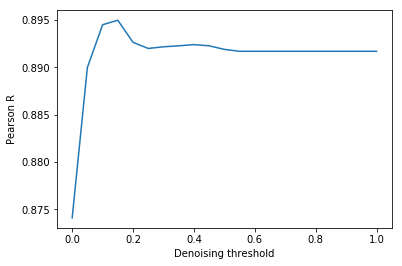

In [38]:
plt.plot(T, spearman_R)
plt.ylabel('Spearman R')
plt.show()
plt.plot(T, pearson_R)
plt.ylabel('Pearson R')
plt.xlabel('Denoising threshold')
plt.show()

2 0.898963308096
3 0.908538147932
4 0.898695398952
5 0.910716365754
6 0.903937099592
7 0.901316249272
8 0.897682003494
9 0.896598718695
10 0.896167734421


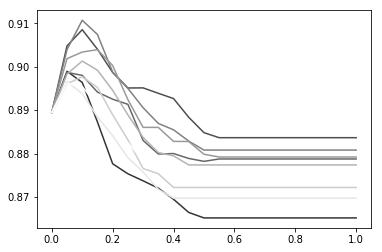

In [42]:
T = sig_y * np.arange(0, 10.5, .5)
#Y_hat = []
for i in range(2,11):
    sR = []
    for t in T:
        w = "db{}".format(i)
        y_denoised = denoise(Y_obs, t=t, wavelet=w, anscombe=False)
        sR.append(stats.spearmanr(y_denoised, Z_obs)[0])
    plt.plot(T,sR,color=str(i/10))
    print(i,max(sR))
plt.show()



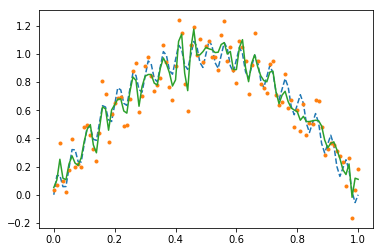

In [47]:
y_denoised = denoise(Y_obs, t=T[2], wavelet='db5', anscombe=False)
plt.plot(X,Y,'--')
plt.plot(X,Y_obs,'.')
plt.plot(X,y_denoised)
plt.show()